In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Geo Features

In [129]:
train_geo = pd.read_csv('../data/train_longlat.csv')
train_latlng = train_geo[['lat','lng']]
train_latlng.head()

,lat,lng
0,37.750648,-122.418316
1,37.784040,-122.419381
2,37.785660,-122.421476
3,37.788499,-122.421892
4,37.787084,-122.421757


In [338]:
park_geo = pd.read_csv('../data/parkingrecords.csv')[['lat','lon']]
park_latlng = pd.DataFrame({'lat':park_geo.lat, 'lng': park_geo.lon})
park_latlng = park_latlng.drop_duplicates()

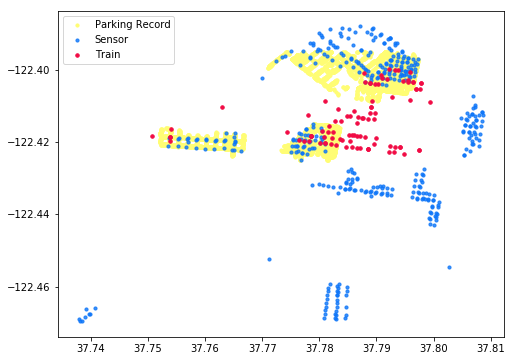

In [404]:
plt.figure(figsize = (8,6))
plt.scatter(park_latlng.lat,park_latlng.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

In [209]:
train_latlng.describe()

,lat,lng
count,96.000000,96.000000
mean,37.785942,-122.413758
std,0.009961,0.007197
min,37.750648,-122.423180
25%,37.782333,-122.419683
50%,37.787795,-122.416725
75%,37.792295,-122.408122
max,37.799464,-122.399797


In [339]:
#Setting a limit to where we want to see these data
lat_min = 37.745
lat_max = 37.802
lng_min = -122.425
lng_max = -122.395

In [372]:
park_filter = park_latlng[(park_latlng.lat>=lat_min) & (park_latlng.lat <= lat_max) &(park_latlng.lng>=lng_min) & (park_latlng.lng <= lng_max)]

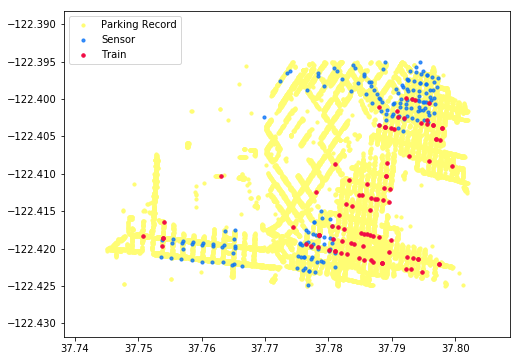

In [403]:
plt.figure(figsize = (8,6))
plt.scatter(park_filter.lat,park_filter.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

### Get relevant parking record data

In [266]:
pr = pd.read_csv('../data/park_rec_dt_217.csv')
pr_filtered = pr[(pr.lat>=lat_min) & (pr.lat <= lat_max) &(pr.lon>=lng_min) & (pr.lon <= lng_max)]
pr_filtered.head()

,lat,lon,Date_Time,Minute,Hour,Dow,Time,isweekend
13,37.756761,-122.419010,2016-06-28 16:04:16,4,16,1,1604,0
14,37.758658,-122.418486,2016-06-28 17:04:59,4,17,1,1704,0
21,37.796008,-122.400311,2016-07-16 18:56:58,56,18,5,1856,0
22,37.768435,-122.414295,2016-07-18 08:59:07,59,8,0,859,1
37,37.781675,-122.401493,2016-09-11 12:05:08,5,12,6,1205,1


In [251]:
pr_unique = pr_filtered[['lat','lon']]
pr_unique = pr_unique.drop_duplicates()

In [522]:
pr_unique['pr_lat3'] = round(pr_unique['lat'],3)
pr_unique['pr_lng3'] = round(pr_unique['lon'],3)
pr_unique['pr_lat2'] = round(pr_unique['lat'],2)
pr_unique['pr_lng2'] = round(pr_unique['lon'],2)

In [556]:
train_ll = pd.read_csv('../data/train_longlat.csv')
train_ll['lat3'] = round(train_ll.lat,3)
train_ll['lng3'] = round(train_ll.lng,3)
train_ll['lat2'] = round(train_ll.lat,2)
train_ll['lng2'] = round(train_ll.lng,2)

In [557]:
pr_unique.head()

,lat,lon,pr_lat3,pr_lng3,pr_lat2,pr_lng2
13,37.756761,-122.419010,37.757,-122.419,37.76,-122.42
14,37.758658,-122.418486,37.759,-122.418,37.76,-122.42
21,37.796008,-122.400311,37.796,-122.400,37.80,-122.40
22,37.768435,-122.414295,37.768,-122.414,37.77,-122.41
34,37.750534,-122.427381,37.751,-122.427,37.75,-122.43


In [558]:
train_ll.head()

,Street,From,To,lat,lng,lat3,lng3,lat2,lng2
0,Mission Street,25th Street,26th Street,37.750648,-122.418316,37.751,-122.418,37.75,-122.42
1,Polk Street,Ellis Street,Olive Street,37.784040,-122.419381,37.784,-122.419,37.78,-122.42
2,Van Ness Avenue,Geary Boulevard,Myrtle Street,37.785660,-122.421476,37.786,-122.421,37.79,-122.42
3,Van Ness Avenue,Bush Street,Fern Street,37.788499,-122.421892,37.788,-122.422,37.79,-122.42
4,Van Ness Avenue,Daniel Burnham Court,Post Street,37.787084,-122.421757,37.787,-122.422,37.79,-122.42


In [559]:
park_train = pd.merge(pr_unique,train_ll, how = 'left', left_on=['pr_lat3','pr_lng3'], right_on=['lat3','lng3'])

In [560]:
park_train = park_train.dropna().drop_duplicates()

In [573]:
park_matched = pd.DataFrame({'lat':park_train.lat_x, 'lng': park_train.lon, 'Street':park_train.Street, 
                            'From':park_train.From,'To':park_train.To, 'S_lat': park_train.lat_y, 'S_lng': park_train.lng}) 

In [574]:
park_matched.head()

,From,S_lat,S_lng,Street,To,lat,lng
13,Van Ness Avenue,37.778279,-122.419829,Van Ness Avenue,Grove Street,37.778183,-122.420120
79,Washington Street,37.795880,-122.400531,Battery Street,Merchant Street,37.796448,-122.400551
152,Julia Street,37.778053,-122.412424,Mission Street,Angelo's Alley,37.778162,-122.412129
179,Mission Street,37.753846,-122.418619,23rd Street,Bartlett Street,37.753747,-122.419304
180,Mission Street,37.753846,-122.418619,23rd Street,Capp Street,37.753747,-122.419304


In [577]:
park_matched['dist'] = abs(park_matched.S_lat - park_matched.lat) + abs(park_matched.lng - park_matched.lng)

In [587]:
park_matched

,From,S_lat,S_lng,Street,To,lat,lng,dist
13,Van Ness Avenue,37.778279,-122.419829,Van Ness Avenue,Grove Street,37.778183,-122.420120,0.000096
79,Washington Street,37.795880,-122.400531,Battery Street,Merchant Street,37.796448,-122.400551,0.000568
152,Julia Street,37.778053,-122.412424,Mission Street,Angelo's Alley,37.778162,-122.412129,0.000109
179,Mission Street,37.753846,-122.418619,23rd Street,Bartlett Street,37.753747,-122.419304,0.000099
180,Mission Street,37.753846,-122.418619,23rd Street,Capp Street,37.753747,-122.419304,0.000099
226,McAllister Street,37.780095,-122.420190,Van Ness Avenue,Van Ness Avenue,37.780199,-122.419951,0.000104
298,Jones Street,37.786743,-122.413182,Geary Street,Geary Street,37.786732,-122.412676,0.000011
299,Colin Place,37.787394,-122.413318,Jones Street,Geary Street,37.786732,-122.412676,0.000662
302,O'Farrell Street,37.784762,-122.421296,Van Ness Avenue,Alice B. Toklas Place,37.785250,-122.420866,0.000488
317,California Street,37.793224,-122.399989,Battery Street,Pine Street,37.792899,-122.399815,0.000325


In [580]:
m = park_matched.groupby(['lat','lng'])[['dist']].min().reset_index()

In [588]:
m2 = pd.merge(m, park_matched,how = 'left', left_on=['lat','lng','dist'], 
              right_on=['lat','lng','dist'])

In [593]:
selected_pr = m2.drop(['dist','S_lat','S_lng'],axis =1)

In [595]:
selected_pr_full = pd.merge(selected_pr,pr_filtered, how = 'left', left_on=['lat','lng'], right_on=['lat','lon'] )

In [598]:
selected_pr_full

,lat,lng,From,Street,To,lon,Date_Time,Minute,Hour,Dow,Time,isweekend
0,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 10:34:42,34,10,1,1034,0
1,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 07:46:03,46,7,1,746,0
2,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 06:49:23,49,6,1,649,0
3,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 06:32:55,32,6,1,632,0
4,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 05:19:48,19,5,1,519,0
5,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 05:02:12,2,5,1,502,0
6,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 02:36:01,36,2,1,236,0
7,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 10:53:16,53,10,0,1053,1
8,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 08:47:13,47,8,0,847,1
9,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 07:30:01,30,7,0,730,1


In [599]:
selected_pr_full.to_csv("../data/pr_streetmatch.csv", index = False)

In [ ]:
## After filtering out

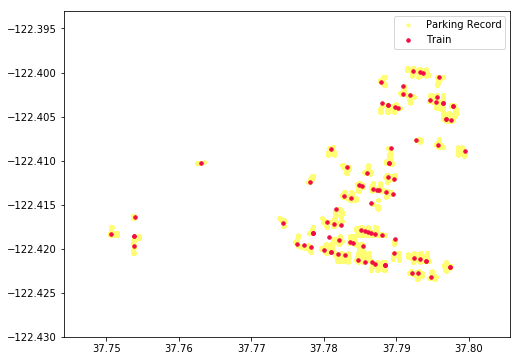

In [600]:
plt.figure(figsize = (8,6))
plt.scatter(selected_pr_full.lat,selected_pr_full.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Train'])